In [1]:
import sys
import os
import pandas as pd

# Get the directory of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, ".."))

run_results = pd.read_parquet(
    os.path.abspath(
        os.path.join(notebook_dir, "../../cache/parquet/analysis.parquet")
    )
)

print(run_results)

      season  week     gameId gameDisplay           gameDate homeTeamId  \
0       2024    10  401671637   DEN vs KC  2024-11-10T18:00Z         12   
1       2024    10  401671641  PIT vs WSH  2024-11-10T18:00Z         28   
2       2024    10  401671676  PHI vs DAL  2024-11-10T21:25Z          6   
3       2024    10  401671678  NYJ vs ARI  2024-11-10T21:25Z         22   
4       2024    10  401671693  MIA vs LAR  2024-11-12T01:15Z         14   
...      ...   ...        ...         ...                ...        ...   
1651    2015     3  400791597   SF vs ARI  2015-09-27T20:05Z         22   
1652    2015     3  400791623  BUF vs MIA  2015-09-27T20:25Z         15   
1653    2015     3  400791626  CHI vs SEA  2015-09-27T20:25Z         26   
1654    2015     3  400791631  DEN vs DET  2015-09-28T00:30Z          8   
1655    2015     3  400791635    KC vs GB  2015-09-29T00:30Z          9   

     homeTeamDisplay  homeScore awayTeamId awayTeamDisplay  ...  neutralField  \
0                 

In [ ]:
total = len(run_results.index)

def process_totals():
    print("total", len(run_results.index))
    print("home selected", len(run_results[run_results["grade"] >= 2].index) / total)
    print("away selected", len(run_results[run_results["grade"] <= -2].index) / total)
    print("unknown", len(run_results[run_results["grade"].abs() == 1].index) / total)

def analyze_boundries(label, boundry):
    print(f"---{label}---")
    chosen = run_results[run_results[label].abs() >= boundry]

    correct = chosen[
        ((chosen[label] >= boundry) & (chosen["expected"] == True))
        | ((chosen[label] <= -boundry) & (chosen["expected"] == False))
    ]

    home_selected = chosen[(chosen[label] >= boundry)]
    home_correct = correct[(correct[label] >= boundry)]

    print("accuracy", len(correct.index) / len(chosen.index))
    print("chosen", len(chosen.index), len(chosen.index) / total)
    print("correct", len(correct.index))
    print("home_selected", len(home_selected.index))
    print("home_correct", len(home_correct.index))


process_totals()
analyze_boundries('grade', 2)
analyze_boundries('playerRating', 50)
analyze_boundries('teamRating', 50)
analyze_boundries('statsRating', 50)


total 1656
home selected 0.38405797101449274
away selected 0.41847826086956524
unknown 0.19746376811594202
---grade---
accuracy 0.5891647855530474
chosen 1329 0.802536231884058
correct 783
home_selected 636
home_correct 404
---playerRating---


ZeroDivisionError: division by zero

In [ ]:
import numpy as np
import seaborn as sbn

from scipy import stats

reduced = run_results[(np.abs(stats.zscore(run_results[
    ['statsRating', 'playerRating', 'teamRating']
])) < 3).all(axis=1)].copy()

reduced['merge'] = reduced['playerRating'] + reduced['teamRating'] + reduced['statsRating']
reduced['diff'] = reduced['homeScore'] - reduced['awayScore']
reduced['gameRating'] = reduced['homeRating'] - reduced['awayRating']


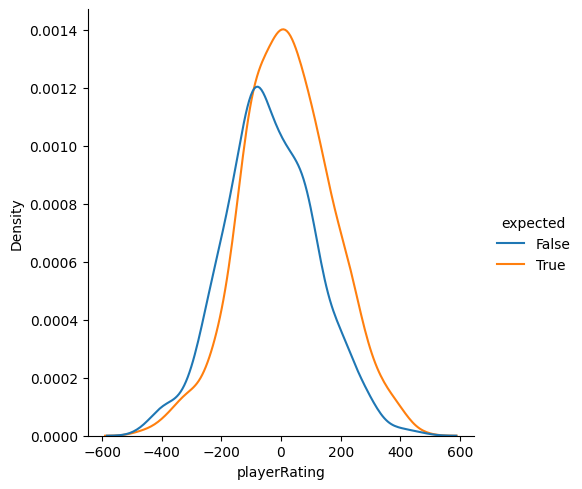

In [ ]:
sbn.displot(data=reduced, x="playerRating", hue='expected', kind="kde")

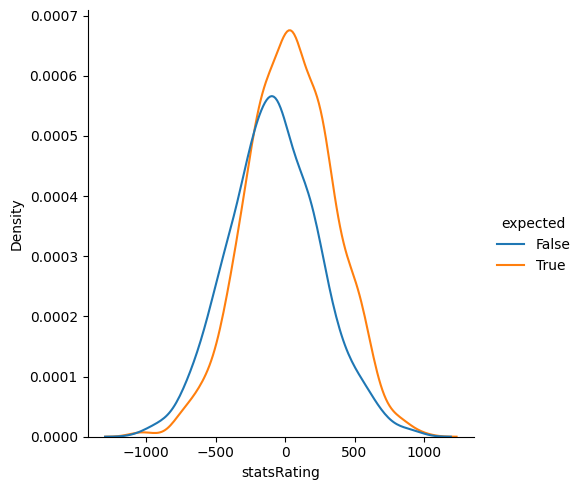

In [ ]:
sbn.displot(data=reduced, x="statsRating", hue='expected', kind="kde")

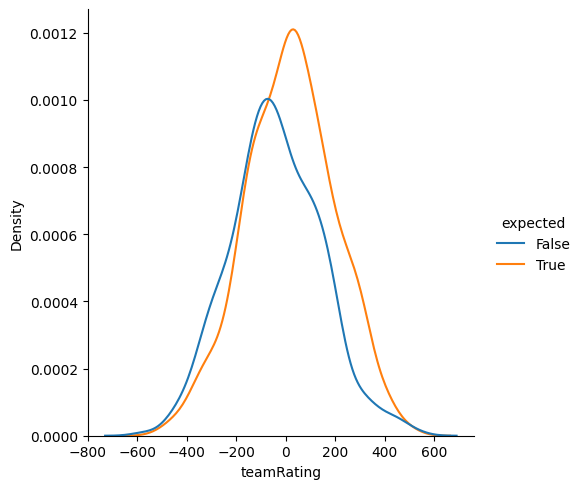

In [ ]:
sbn.displot(data=reduced, x="teamRating", hue='expected', kind="kde")

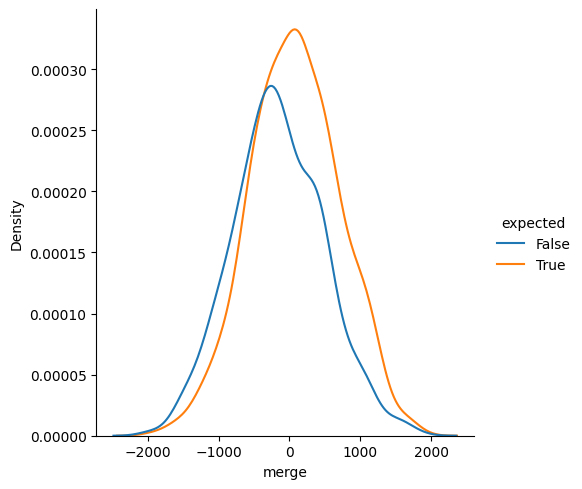

In [ ]:
sbn.displot(data=reduced, x="merge", hue='expected', kind="kde")

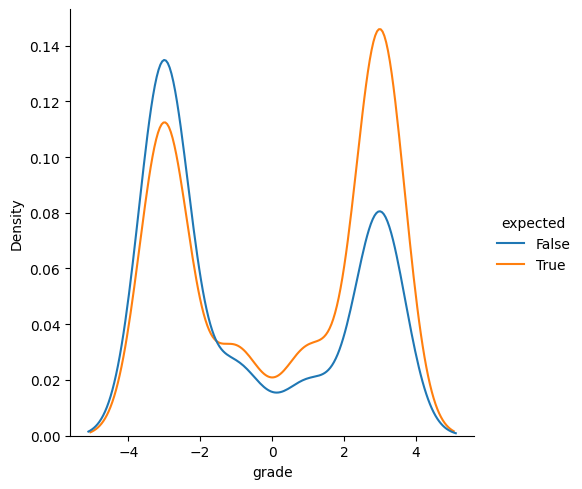

In [ ]:
sbn.displot(data=reduced, x="grade", hue='expected', kind="kde")

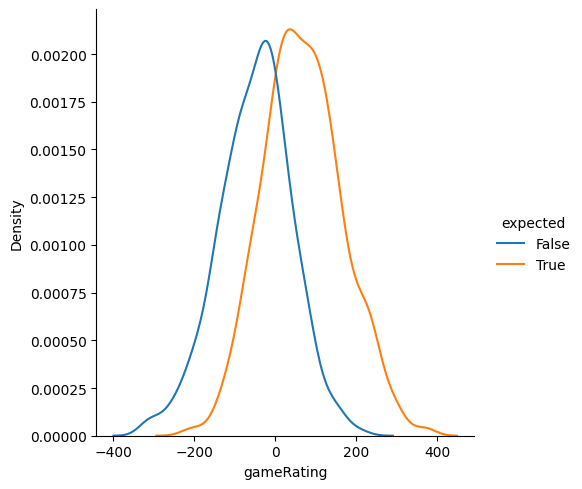

In [ ]:
sbn.displot(data=reduced, x="gameRating", hue='expected', kind="kde")

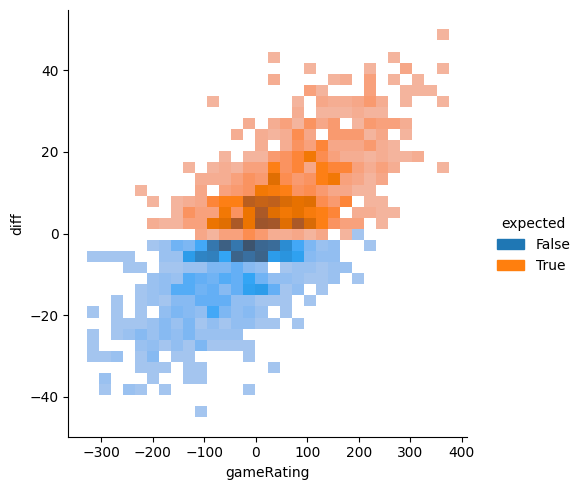

In [ ]:
sbn.displot(data=reduced, x="gameRating", y="diff", hue='expected')

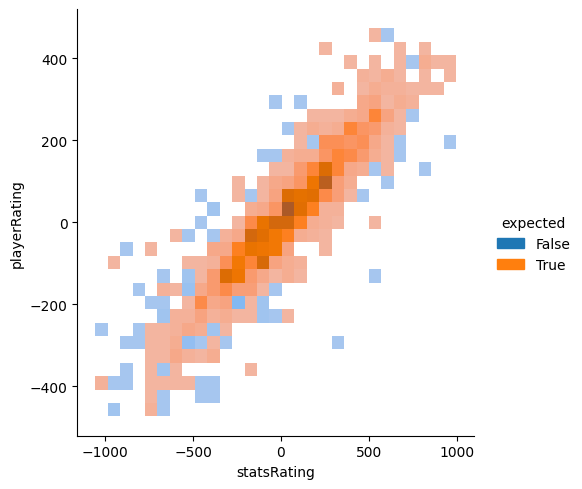

In [ ]:
sbn.displot(data=reduced, x="statsRating", y="playerRating", hue='expected')

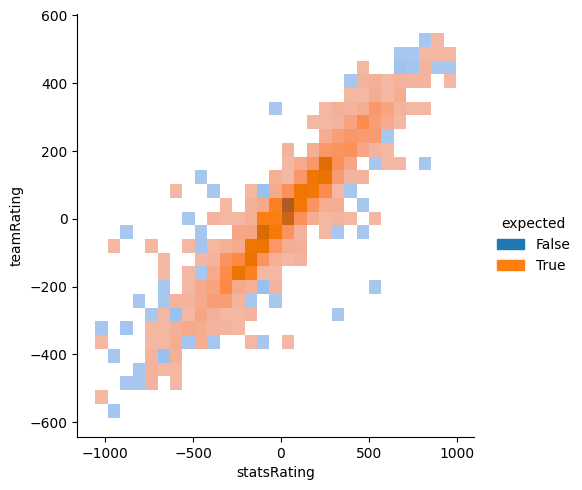

In [ ]:
sbn.displot(data=reduced, x="statsRating", y="teamRating", hue='expected')

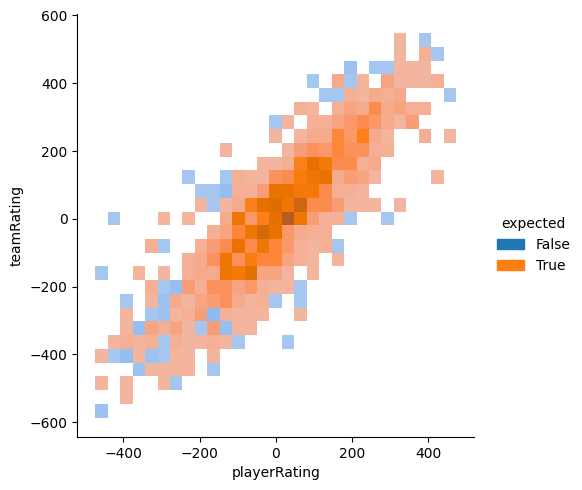

In [ ]:
sbn.displot(data=reduced, x="playerRating", y="teamRating", hue='expected')

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson correlation 
def show_correlation(column: str, compare: str):
    print(f"Show correlation of: {column} vs {compare}")

    pearson_corr, _ = pearsonr(reduced[column], reduced[compare])
    print(f"Pearson correlation: {pearson_corr}")

    # Calculate Spearman correlation 
    spearman_corr, _ = spearmanr(reduced[column], reduced[compare])
    print(f"Spearman correlation: {spearman_corr}")

show_correlation('statsRating', 'expected')
show_correlation('playerRating', 'expected')
show_correlation('teamRating', 'expected')
show_correlation('grade', 'expected')

show_correlation('statsRating', 'diff')
show_correlation('playerRating', 'diff')
show_correlation('teamRating', 'diff')
show_correlation('grade', 'diff')

print('========sanity========')
show_correlation('diff', 'expected')

Show correlation of: statsRating vs expected
Pearson correlation: 0.18175144580896435
Spearman correlation: 0.18386180395908314
Show correlation of: playerRating vs expected
Pearson correlation: 0.18402614673534734
Spearman correlation: 0.18549768505115574
Show correlation of: teamRating vs expected
Pearson correlation: 0.1633711753381716
Spearman correlation: 0.1662845582871369
Show correlation of: grade vs expected
Pearson correlation: 0.17532224019321568
Spearman correlation: 0.17537281119406536
Show correlation of: statsRating vs diff
Pearson correlation: 0.24311008592384398
Spearman correlation: 0.24202771782742813
Show correlation of: playerRating vs diff
Pearson correlation: 0.25080267321491917
Spearman correlation: 0.24971983138284692
Show correlation of: teamRating vs diff
Pearson correlation: 0.22485081009152685
Spearman correlation: 0.22011332161712197
Show correlation of: grade vs diff
Pearson correlation: 0.23177688678214692
Spearman correlation: 0.22428907620560884
======

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.metrics import roc_curve, auc

def find_threshold(field, target=0.6):
    new_field = f"prob_{field}"
    reduced[new_field] = (reduced[field] - reduced[field].min()) / (
        reduced[field].max() - reduced[field].min()
    )

    fpr, tpr, thresholds = roc_curve(reduced['expected'], reduced[new_field])
    roc_auc = auc(fpr, tpr)
    print(f"Area under the ROC curve for {field}: {roc_auc}")

    ####################################
    # The optimal cut off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({
        'fpr' : pd.Series(fpr, index=i),
        'tpr' : pd.Series(tpr, index = i), 
        '1-fpr' : pd.Series(1-fpr, index = i), 
        'tf' : pd.Series(tpr - (1-fpr), index = i),
        'diff' : pd.Series((1-fpr) - tpr, index = i),
        'thresholds' : pd.Series(thresholds, index = i)
    })
    
    # This gives where the two values are .7 apart
    pos = (np.abs(roc['diff'] - target)).idxmin()

    # This gives you where the lines cross
    # pos = (roc.tf-0).abs().argsort()[:1]
    ideal = {str(key): float(value) for key, value in roc.iloc[pos].items()}
    print(ideal)
    target = ideal['thresholds'] * (reduced[field].max() - reduced[field].min()) + reduced[field].min()
    print('threshold value =>', target)

    # Plot tpr vs 1-fpr
    """
    fig, ax = pl.subplots()
    pl.plot(roc['tpr'])
    pl.plot(roc['1-fpr'], color = 'red')
    pl.xlabel('1-False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(field)
    ax.set_xticklabels([])
    """
    return int(target)

targets = {
    "player": find_threshold('playerRating'),
    "team": find_threshold('teamRating'),
    "stats": find_threshold('statsRating')
}


Area under the ROC curve for playerRating: 0.607549385893676
{'fpr': 0.1445929526123937, 'tpr': 0.25783619817997977, '1-fpr': 0.8554070473876063, 'tf': -0.5975708492076266, 'diff': 0.5975708492076266, 'thresholds': 0.6269479672179737}
threshold value => 119.63124901944661
Area under the ROC curve for teamRating: 0.5964098399527242
{'fpr': 0.15674362089914945, 'tpr': 0.243680485338726, '1-fpr': 0.8432563791008505, 'tf': -0.5995758937621245, 'diff': 0.5995758937621245, 'thresholds': 0.64538999335896}
threshold value => 145.6318774302565
Area under the ROC curve for statsRating: 0.6066009211902004
{'fpr': 0.14580801944106925, 'tpr': 0.2537917087967644, '1-fpr': 0.8541919805589308, 'tf': -0.6004002717621664, 'diff': 0.6004002717621664, 'thresholds': 0.6380128465971483}
threshold value => 253.36798443149337


In [ ]:
def analyze(player, team, stats):
    chosen = run_results[(run_results['playerRating'].abs() >= player) & 
                         (run_results['teamRating'].abs() >= team) & 
                         (run_results['statsRating'].abs() >= stats)].reset_index(drop=True)
    sub = (
        (chosen['playerRating'] >= player) & 
        (chosen['teamRating'] >= team) & 
        (chosen['statsRating'] >= stats) &
        (chosen["expected"] == True)
    ) | (
        (chosen['playerRating'] <= -player) & 
        (chosen['teamRating'] <= -team) & 
        (chosen['statsRating'] <= -stats) &
        (chosen["expected"] == False)
    )
    chosen['diff'] = chosen['homeScore'] - chosen['awayScore']
    correct = chosen[sub]
    chosen['correct'] = False
    chosen.loc[sub, 'correct'] = True

    print("chosen", len(chosen.index), len(chosen.index) / total)
    print("correct", len(correct.index), len(correct.index) / len(chosen.index))

    chosen['gameRating'] = chosen['gameRating'].astype(int)\

    print(correct)
    chosen[[
        'season', 
        'week', 
        'expected',
        'correct',
        'gameRating',
        'homeTeamDisplay', 
        'awayTeamDisplay', 
        'diff',
        'playerRating',
        'teamRating',
        'statsRating',
    ]].rename(columns={'homeTeamDisplay': 'home', 'awayTeamDisplay': 'away'}).to_parquet(
        os.path.abspath(
            os.path.join(notebook_dir, f"../../cache/parquet/chosen_{player}_{team}_{stats}.parquet")
        )
    )



# analyze(154, 178, 308) => 0.65 0.22
analyze(targets['player'], targets['team'], targets['stats'])
print(targets)

chosen 544 0.2964577656675749
correct 353 0.6488970588235294
     season  week     gameId gameDisplay           gameDate homeTeamId  \
0      2024     9  401671623  DEN vs BAL  2024-11-03T18:00Z         33   
1      2024     9  401671647  IND vs MIN  2024-11-04T01:20Z         16   
2      2024     9  401671711  WSH vs NYG  2024-11-03T18:00Z         19   
3      2024     9  401671797  JAX vs PHI  2024-11-03T21:05Z         21   
4      2024     8  401671600  CAR vs DEN  2024-10-27T20:25Z          7   
..      ...   ...        ...         ...                ...        ...   
538    2015     3  400791546  CIN vs BAL  2015-09-27T17:00Z         33   
539    2015     3  400791553   JAX vs NE  2015-09-27T17:00Z         17   
540    2015     3  400791557   NO vs CAR  2015-09-27T17:00Z         29   
542    2015     3  400791594  PIT vs STL  2015-09-27T17:00Z         14   
543    2015     3  400791631  DEN vs DET  2015-09-28T00:30Z          8   

    homeTeamDisplay  homeScore awayTeamId awayTeam

In [ ]:
chosen[(
        (run_results['playerRating'] >= player) & 
        (run_results['teamRating'] >= team) & 
        (run_results['statsRating'] >= stats) &
        (run_results["expected"] == True)
    ) | (
        (run_results['playerRating'] <= -player) & 
        (run_results['teamRating'] <= -team) & 
        (run_results['statsRating'] <= -stats) &
        (run_results["expected"] == False)
    )]